In [1]:
"""
This file will implement ViTs as encoders for GANs 
"""

'\nThis file will implement ViTs as encoders for GANs \n'

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms, datasets
from transformers import ViTModel, ViTConfig
import cv2
from utils import CustomDataset
import argparse
import matplotlib.pyplot as plt


/home/hevra/anaconda3/envs/HLCV/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# taking care of the dataset

IMG_SHAPE = (3, 368, 544)
BATCH_SIZE = 2
real_train_folder = "/home/hevra/Desktop/hlcv/term_project/code/data/data/real/train/images"
synt_train_folder = "/home/hevra/Desktop/hlcv/term_project/code/data/data/synthetic/train/images"
real_val_folder = "/home/hevra/Desktop/hlcv/term_project/code/data/data/real/val/images"
synt_val_folder = "/home/hevra/Desktop/hlcv/term_project/code/data/data/synthetic/val/images"

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((IMG_SHAPE[1], IMG_SHAPE[2]))
])

train_dataset = CustomDataset(real_train_folder, synt_train_folder, transform)
train_dataloader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)

val_dataset = CustomDataset(real_val_folder, synt_val_folder, transform)
val_dataloader = DataLoader(dataset=val_dataset, batch_size=BATCH_SIZE, shuffle=True)


In [4]:
letsee = next(iter(train_dataloader))
# torch.Size([2, 3, 368, 544]) batch size is 2. 3 is the RGB channels. 368, 544 height and width
print(letsee[0][0].shape)


torch.Size([3, 368, 544])


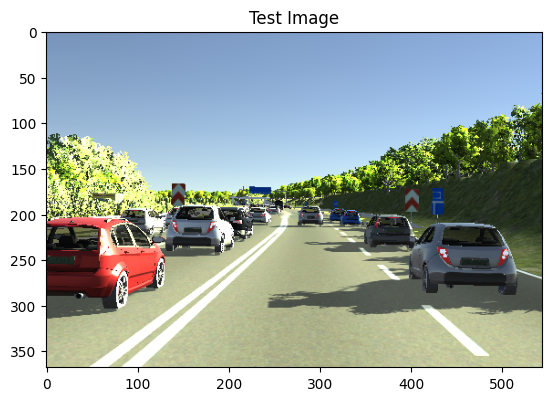

In [5]:
image_tensor = letsee[0][0].permute(1, 2, 0)

# Convert the tensor to a numpy array
image_np = image_tensor.numpy()

# Plot the image
plt.imshow(image_np)
plt.title("Test Image")
plt.show()

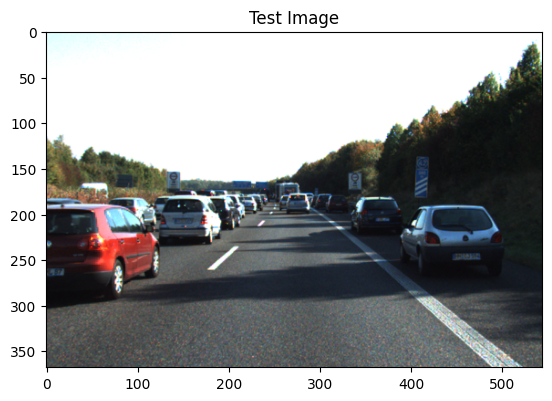

In [6]:
image_tensor = letsee[1][0].permute(1, 2, 0)

# Convert the tensor to a numpy array
image_np = image_tensor.numpy()

# Plot the image
plt.imshow(image_np)
plt.title("Test Image")
plt.show()

In [7]:
image_tensor = letsee[0][0].permute(1, 2, 0)

image_tensor.shape

torch.Size([368, 544, 3])